Rolex R Calupig Jr

BSCS - 2B



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
# Part 1: Data Preprocessing

# Load the Dataset
data = pd.read_csv("/content/Netflix_Userbase.csv")

# Display structure of the dataset
print("Dataset Structure:")
print(data.head())

# Identify and manage missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)


Dataset Structure:
   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  

Missing Values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age      


Descriptive Statistics:
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


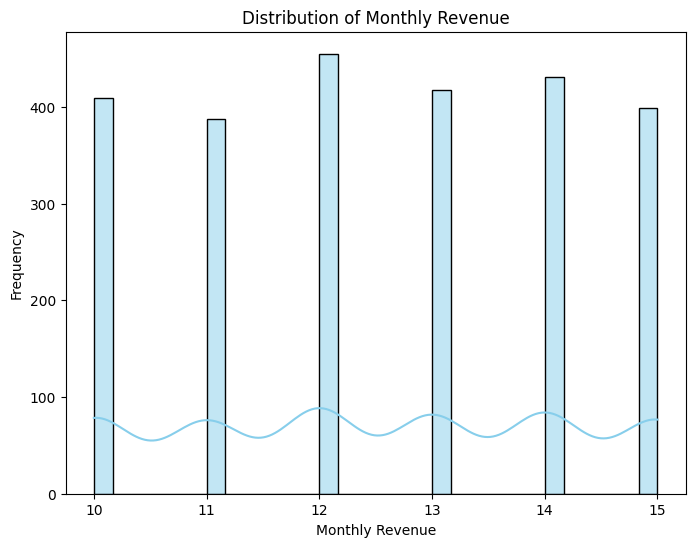

In [ ]:

# Part 2: Exploratory Data Analysis (EDA)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data_encoded.describe())

# Visualizations
# Distribution of Monthly Revenue
plt.figure(figsize=(8, 6))
sns.histplot(data_encoded['Monthly Revenue'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Monthly Revenue")
plt.xlabel("Monthly Revenue")
plt.ylabel("Frequency")
plt.show()


In [ ]:

# Part 3: Linear Regression Model

# Splitting data into train and test sets
X = data_encoded.drop(['User ID','Monthly Revenue'],axis=1)
y = data_encoded['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Model Evaluation
y_pred = linear_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("\nLinear Regression Model Evaluation:")
print("R-squared:", r_squared)
print("Root Mean Squared Error:", rmse)



Linear Regression Model Evaluation:
R-squared: -0.17552958826823084
Root Mean Squared Error: 1.8019423146739808


In [ ]:
# Part 4: Logistic Regression Model

X_logistic = data_encoded.drop(['User ID'], axis=1)
feedback = data_encoded['Age']

# Splitting data into train and test sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, feedback, test_size=0.2, random_state=42)

# Build the Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Model Evaluation
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic, average='weighted')
recall = recall_score(y_test_logistic, y_pred_logistic, average='weighted')
f1 = f1_score(y_test_logistic, y_pred_logistic, average='weighted')
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)



Logistic Regression Model Evaluation:
Accuracy: 0.11
Precision: 0.1292377233301614
Recall: 0.11
F1-score: 0.10740883388705749
Confusion Matrix:
[[2 3 3 2 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 3 4 3 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 4 5 2 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 4 2 0 1 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 5 1 0 4 1 1 0 0 0 3 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 2 2 1 3 2 1 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 2 4 1 2 0 3 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 3 2 0 0 2 4 1 0 1 2 3 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 2 1 0 2 0 0 1 0 4 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 0 3 2 2 0 4 0 2 2 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 4 2 1 2 0 2 0 3 3 2 1 1 1 0 2 1 0 0]
 [0 0 0 0 2 0 3 1 4 1 0 0 2 1 1 1 1 0 0 0 0 2 0 0 0]
 [0 0 0 0 1 1 0 1 1 2 1 1 3 0 2 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 1 2 0 3 2 0 1 2 0 1 0 0 2 4 0 0]
 [0 0 0 0 0 0 0 0 4 0 1 1 4 2 6 1 0 1 1 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 2 2 4 2 3 0 0 0 4 1 1 2 0]
 [0 0 0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                Feature  Coefficient
256  Join Date_27-02-23     1.854064
47   Join Date_05-09-21     1.852146
266  Join Date_27-11-22     1.829137
219  Join Date_23-03-23     1.622774
189  Join Date_20-01-23     1.622537
..                  ...          ...
210  Join Date_22-04-22    -3.482587
227  Join Date_23-11-21    -3.493425
230  Join Date_24-01-22    -3.532228
200  Join Date_21-04-22    -3.546946
103  Join Date_11-01-23    -3.727277

[340 rows x 2 columns]
                        Feature  Coefficient
0               Monthly Revenue     0.685203
97           Join Date_10-06-23     0.150735
319  Last Payment Date_22-06-23     0.149976
336       Country_United States     0.128497
2     Subscription Type_Premium     0.112975
..                          ...          ...
339           Device_Smartphone    -0.030914
340               Device_Tablet    -0.031684
3    Subscription Type_Standard    -0.036585
337                 Gender_Male    -0.062731
1                           Age    -0

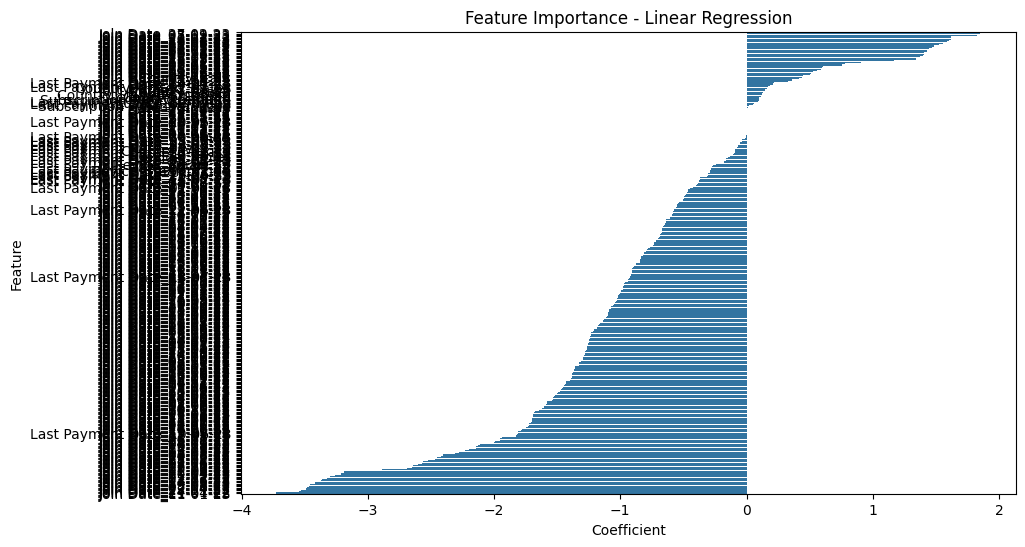

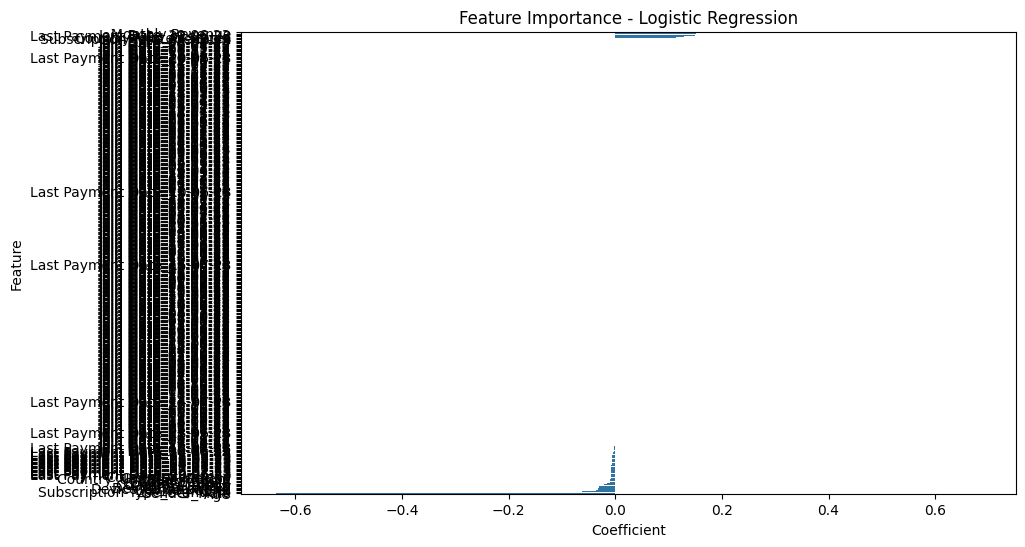

In [ ]:
# Part 5: Comparative Analysis and Visualization

# Feature Importance for Linear Regression
lr_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
lr_coefficients = lr_coefficients.sort_values(by='Coefficient', ascending=False)
print(lr_coefficients)

# Feature Importance for Logistic Regression
logistic_coefficients = pd.DataFrame({'Feature': X_logistic.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print(logistic_coefficients)

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_coefficients)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
